### Reading a .CSV File using Pandas
 

We are going to read data from external source (files) and perform basic plots

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Importing Market-price file from directory


In [3]:
data = pd.read_csv('btc-market-price.csv', header= None) ## The file has no header 
data.head()


,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [4]:
data.shape


(365, 2)

In [5]:
data.info() ## No Null Values are present. GooD!!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       365 non-null    object 
 1   1       365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


Columns are to be named for better future reference

In [6]:
data.columns =['TimeStamp', 'Price']

In [7]:
data.head()

,TimeStamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [8]:
## For the type of data Used
data.dtypes     ## Timestamp is parsed by python/ Pandas As OBJECT instead of datatime-object

TimeStamp     object
Price        float64
dtype: object

Timestamp is parsed by python/ Pandas As OBJECT instead of datatime-object. So we need to fix that before engaring further.

In [9]:
pd.to_datetime(data['TimeStamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: TimeStamp, dtype: datetime64[ns]

In [10]:
data.head()

,TimeStamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [11]:
data['TimeStamp'] = pd.to_datetime(data['TimeStamp']).head()
data.head(3)


,TimeStamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363


In [12]:
## CHecking dtypes
data.dtypes

TimeStamp    datetime64[ns]
Price               float64
dtype: object

In [13]:
data

,TimeStamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937
...,...,...
360,NaT,7960.380000
361,NaT,7172.280000
362,NaT,6882.531667
363,NaT,6935.480000


In [14]:
## I will use the timestamp itself as index
data.set_index('TimeStamp', inplace = True )
data.head()

,Price
TimeStamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [15]:
data.iloc[1]

Price    1141.813
Name: 2017-04-03 00:00:00, dtype: float64

In [16]:
data.loc['2017-04-06'] ## Great


,Price
TimeStamp,
2017-04-06,1196.307937


Using read_csv Command to make all this in one line of code.

In [17]:
df = pd.read_csv(
    'btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

In [18]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


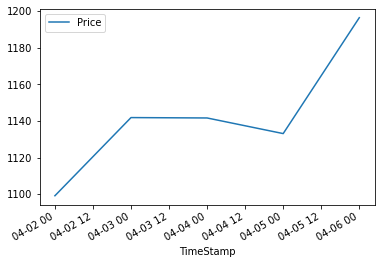

In [19]:
data.plot()

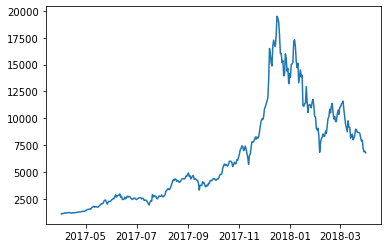

In [20]:
plt.plot(df.index, df['Price'])

### Importing the eth-price data file


In [27]:
eth = pd.read_csv('eth-price.csv', parse_dates= True, index_col= [0])

In [28]:
print(eth.dtypes)
eth.head()

UnixTimeStamp      int64
Value            float64
dtype: object


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


In [29]:
price = pd.DataFrame(index= df.index)

In [25]:
price.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [30]:
price['Bitcoin'] = df['Price']
price['Ether'] = eth['Value']
price.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


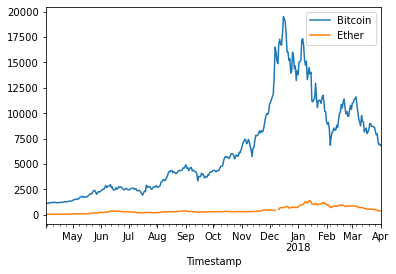

In [31]:
price.plot()